# DBSCAN Project :


# In this notebook, we will use DBSCAN to cluster a couple of datasests. We will examine how changing its parameters (epsilon and min_samples) changes the resulting cluster structure. 

In [108]:
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice

%matplotlib inline


Read the two datasets

These datasets is 2 columns datasets with niosy numbers our goal is to cluser this data using DBSCAN method 

In [109]:
data1=pd.read_csv('blobs.csv')[:100].values
data2=pd.read_csv('varied.csv')[:300].values


now we plot each dataset
and then perform the clustering on it

In [110]:
figsize = (10,10)
point_size=150
point_border=0.8

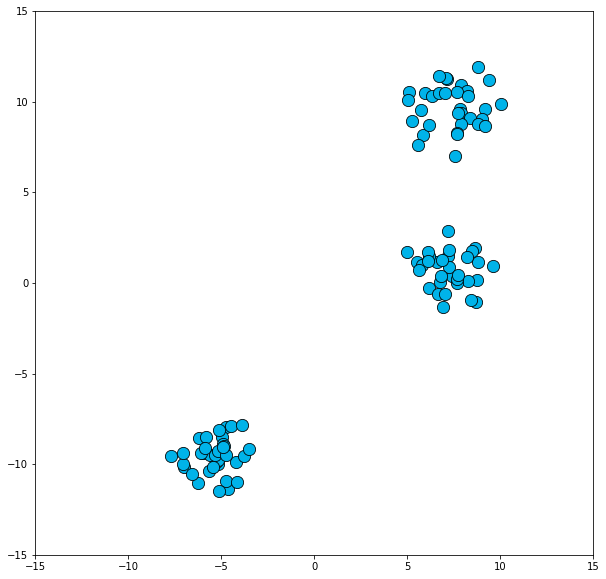

In [111]:
plt.figure(figsize=figsize)
plt.scatter(data1[:,0], data1[:,1], s=point_size, color="#00B3E9", edgecolor='black', lw=point_border)
plt.xlim((-15, 15))
plt.ylim((-15, 15))
plt.show()


As we see the above figure there is three clusters on the data1

our goal is to predict three clusters with DBSCAN , we should change epsilon param and min sample param until converge 

In [112]:
eps1=2
min_samples1=15

dbscan = cluster.DBSCAN(eps=eps1, min_samples=min_samples1)
clustering_labels_1 = dbscan.fit_predict(data1)

In [113]:
def plot_clustered_dataset(dataset, y_pred, xlim=(-15, 15), ylim=(-15, 15), neighborhood=False, epsilon=0.5):

    fig, ax = plt.subplots(figsize=figsize)
    
    colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                     '#f65e97', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
    colors = np.append(colors, '#BECBD6')
    
    
    if neighborhood:
        for point in dataset:
            circle1 = plt.Circle(point, epsilon, color='#666666', fill=False, zorder=0, alpha=0.3)
            ax.add_artist(circle1)

    ax.scatter(dataset[:, 0], dataset[:, 1], s=point_size, color=colors[y_pred], zorder=10, edgecolor='black', lw=point_border)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()
    

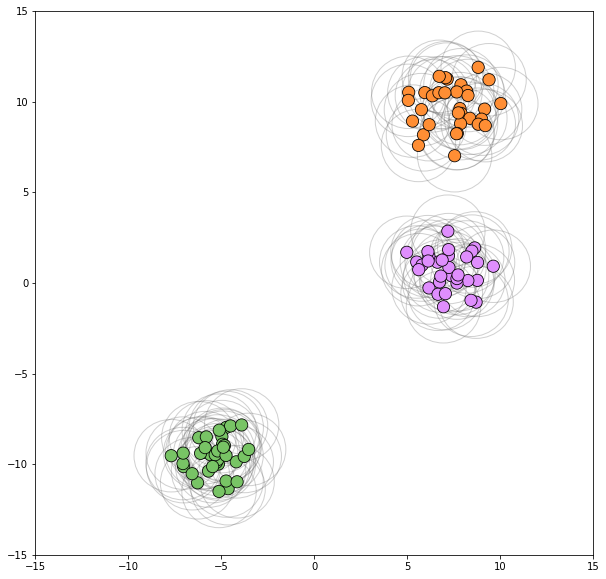

In [114]:
# Plot
plot_clustered_dataset(data1, clustering_labels_1, neighborhood=True, epsilon=2)

as we see its pretty awesome clustered

Now its data2 Turn 

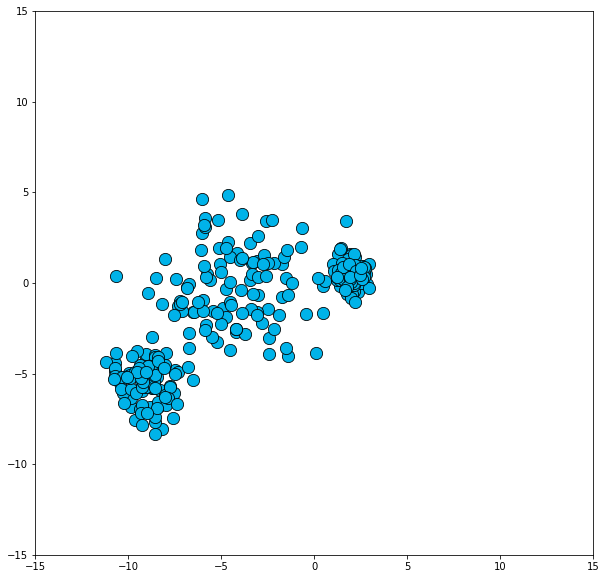

In [115]:
plt.figure(figsize=figsize)
plt.scatter(data2[:,0], data2[:,1], s=point_size, color="#00B3E9", edgecolor='black', lw=point_border)
plt.xlim((-15, 15))
plt.ylim((-15, 15))
plt.show()

data2 Seems to have 3 clusters 

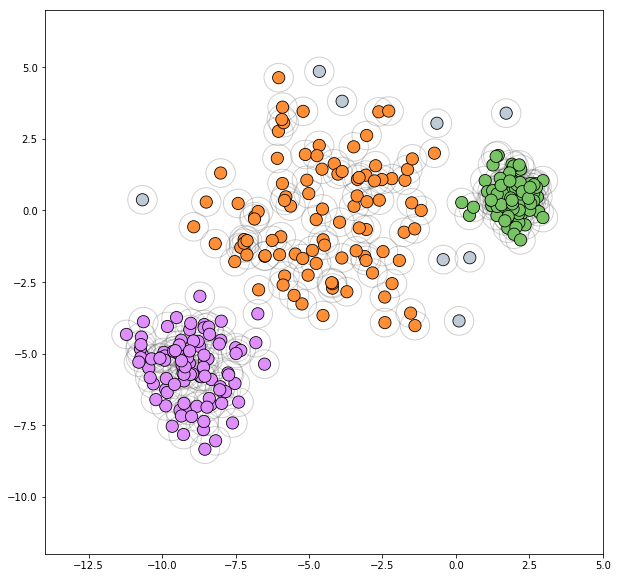

In [116]:
# Experiment with different values for eps and min_samples to find a suitable clustering for the dataset
eps=1.32
min_samples=5


# Cluster with DBSCAN
dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
clustering_labels_2 = dbscan.fit_predict(data2)

# Plot
plot_clustered_dataset(data2, 
                              clustering_labels_2, 
                              xlim=(-14, 5), 
                              ylim=(-12, 7), 
                              neighborhood=True, 
                              epsilon=0.5)

as we see its pretty awesome clustered


# Conclusion :

Changing the number of Min_samples and epsilon value affects the clustering  